# Pymaceuticals Inc.
---

### Analysis

- Given the data, we can comclude that Capomulin & Ramicane are most effective. 
- In the bar graph, Capomulin, has the most mice, while Zoniferol has the least amount of mice. There are only 1 more mare mice than females
- We can also conclude that tumor size increases as the mouse weight increases. 
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df = combined_df[combined_df["Mouse ID"] =="g989"]
dupe_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Tested per Treatment')

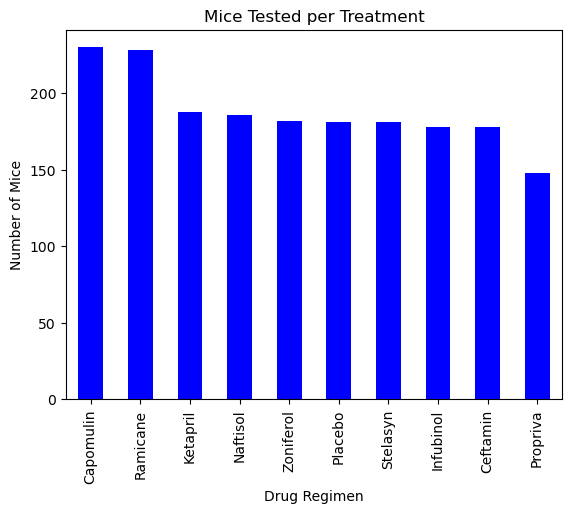

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Tested per Treatment")

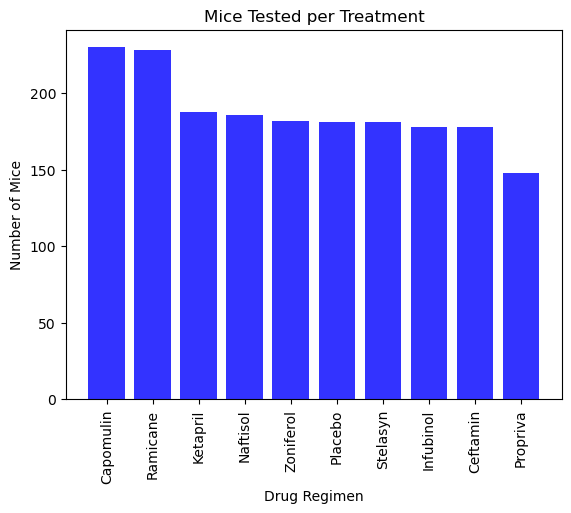

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.title("Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

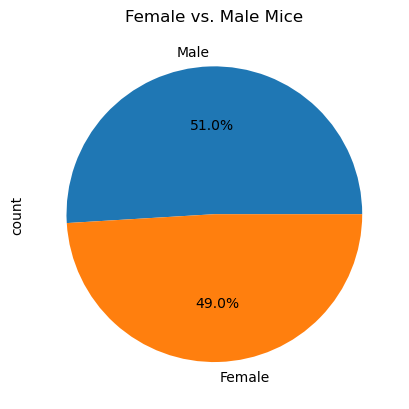

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

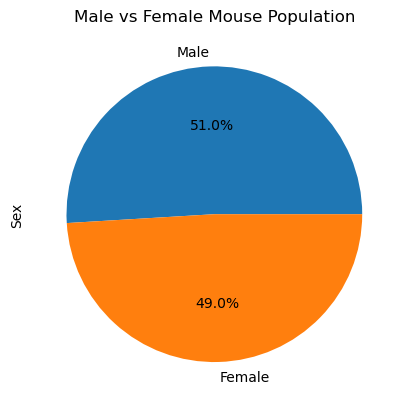

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
four_drugs = pd.concat(frames)

max_time = group_by_ID["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_frames = pd.merge(four_drugs,max_time, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]
merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

time_tumor_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df 

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,s185,Capomulin,45,23.343598
19,x401,Capomulin,45,28.484033
29,m601,Capomulin,45,28.430964
34,f966,Capomulin,20,30.485985
44,u364,Capomulin,45,31.023923
...,...,...,...,...
773,x226,Ceftamin,0,45.000000
783,x581,Ceftamin,45,64.634949
793,x822,Ceftamin,45,61.386660
803,y769,Ceftamin,45,68.594745


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
   
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")

The outliers for Infubinol are 506    36.321346
Name: Tumor Volume (mm3), dtype: float64.


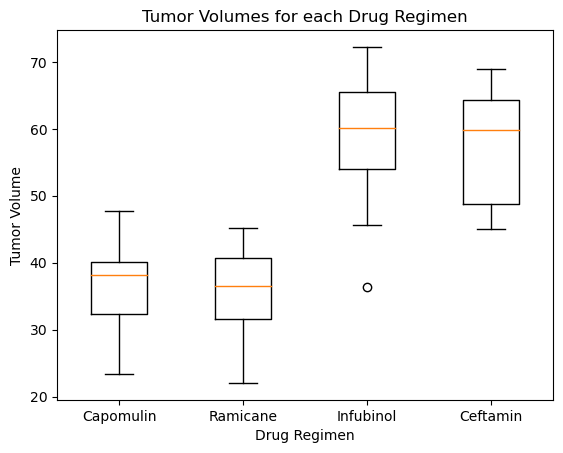

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

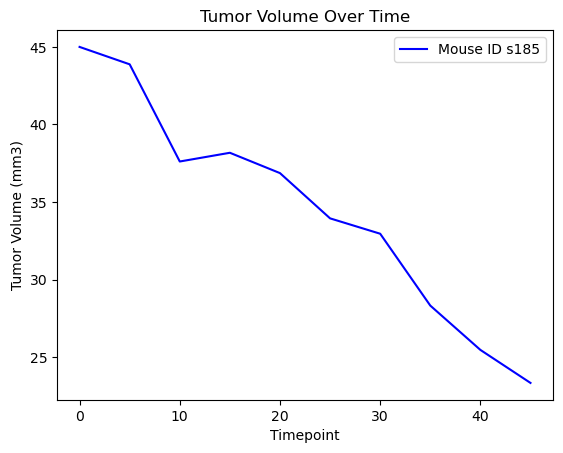

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse185 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]

x = Mouse185["Timepoint"]
y = Mouse185["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue",label="Mouse ID s185")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

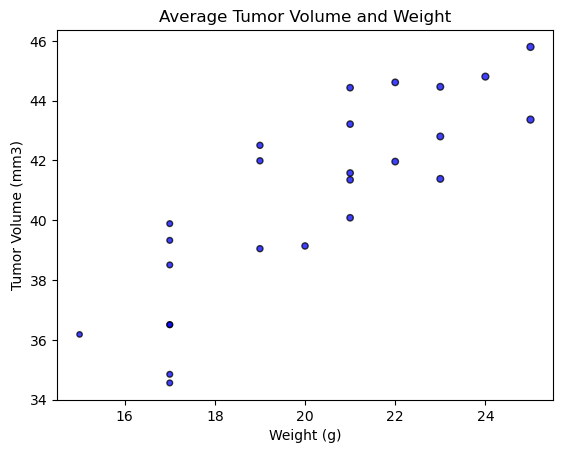

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_data = Capomulin_df.groupby("Mouse ID")

mouseWg = mouse_data["Weight (g)"].mean()
mouseTV = mouse_data["Tumor Volume (mm3)"].mean()

mouse_df = pd.DataFrame({"Weight (g)": mouseWg,
                       "Tumor Volume (mm3)": mouseTV})

x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


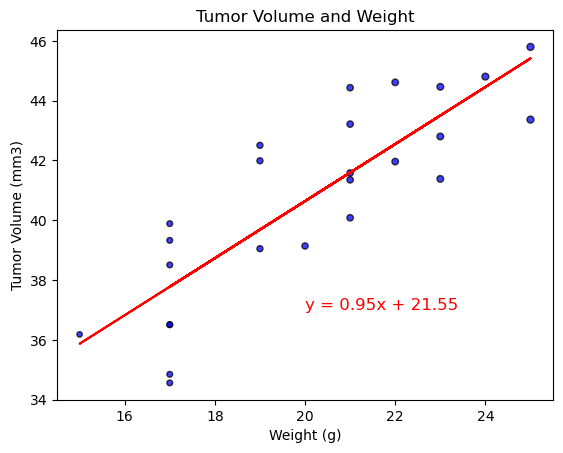

In [52]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#x and y
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#calculate regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
